In [2]:
import pandas as pd
import numpy as np
import operator

from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
import missingno as msno 

from sklearn.metrics import accuracy_score


In [3]:
# read the full data set
data_df = pd.read_csv('train_ml.csv', index_col=0)
test_df = pd.read_csv('test_ml.csv', index_col=0)

### Gain some information about the data set

In [4]:
data_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               37994 non-null  object 
 2   tld               37992 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39573 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39660 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

As it can be seen, there are some missing entries for the attributes 1, 2, 3 and 10. These have to be filled now.

We can visualise the missing data using  the missingo Python package.

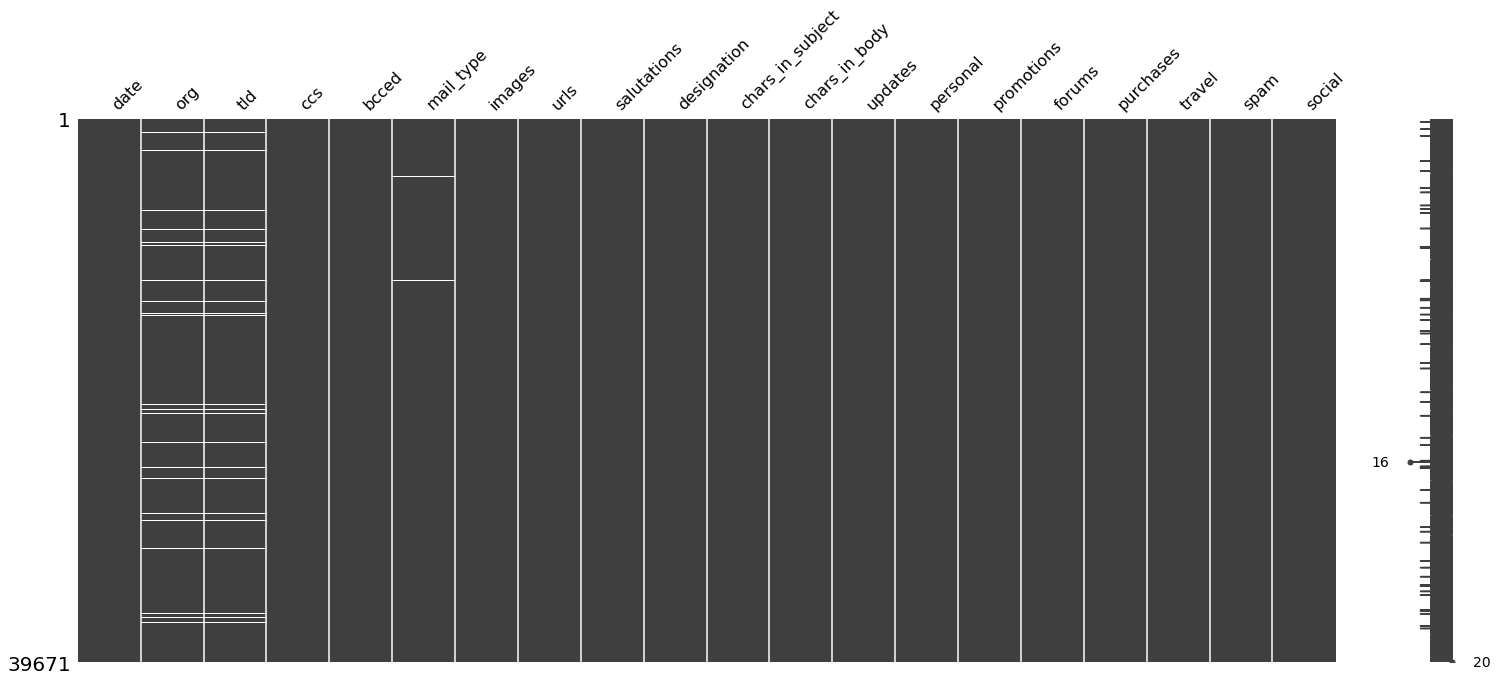

In [5]:
msno.matrix(data_df)

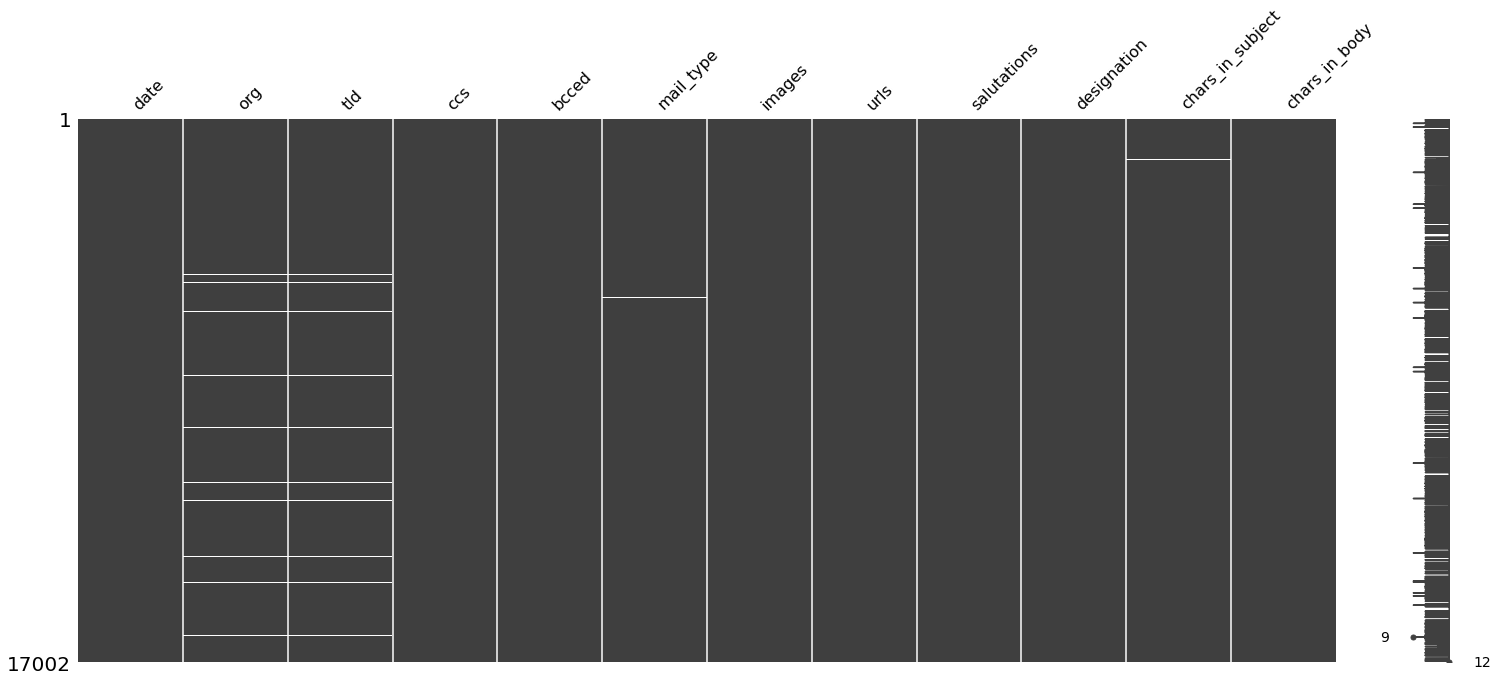

In [6]:
msno.matrix(test_df)

**All transformations will be done with the test data equally!**

In [7]:
data_df['chars_in_subject'] = data_df['chars_in_subject'].fillna(value=.0)
test_df['chars_in_subject'] = test_df['chars_in_subject'].fillna(value=.0)
data_df = data_df.fillna(value='None')
test_df = test_df.fillna(value='None')
data_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               39671 non-null  object 
 2   tld               39671 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39671 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39671 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

In [8]:
print(data_df['updates'].sum())
print(data_df['personal'].sum())
print(data_df['promotions'].sum())
print(data_df['forums'].sum())
print(data_df['purchases'].sum())
print(data_df['travel'].sum())
print(data_df['spam'].sum())
print(data_df['social'].sum())

14377
32118
7925
6181
329
100
152
4005


In [9]:
print(data_df[['mail_type']].groupby(['mail_type'],as_index=False).size())
test_df.shape

                mail_type   size
0   Multipart/Alternative      2
1         Multipart/Mixed     21
2                    None     98
3               Text/Html      6
4           multipart/IDM      1
5   multipart/alternative  28194
6         multipart/mixed   3384
7       multipart/related    902
8        multipart/report     12
9        multipart/signed     23
10              text/HTML      1
11          text/calendar      2
12              text/html   5588
13             text/html      40
14             text/plain   1397


(17002, 12)

There are redundancies due to different use of capital letters, etc. They will now be removed.

In [10]:
data_df.mail_type = data_df.mail_type.replace(['Multipart/Alternative','multipart/alternative'],'multipart/alternative')
data_df.mail_type = data_df.mail_type.replace(['Multipart/Mixed','multipart/mixed'],'multipart/mixed')
data_df.mail_type = data_df.mail_type.replace(['text/HTML', 'Text/Html','text/html','text/html '],'text/html')

test_df.mail_type = test_df.mail_type.replace(['Multipart/Alternative','multipart/alternative'],'multipart/alternative')
test_df.mail_type = test_df.mail_type.replace(['Multipart/Mixed','multipart/mixed'],'multipart/mixed')
test_df.mail_type = test_df.mail_type.replace(['text/HTML', 'Text/Html','text/html','text/html '],'text/html')

print(data_df[['mail_type']].groupby(['mail_type'],as_index=False).size())
test_df.shape

               mail_type   size
0                   None     98
1          multipart/IDM      1
2  multipart/alternative  28196
3        multipart/mixed   3405
4      multipart/related    902
5       multipart/report     12
6       multipart/signed     23
7          text/calendar      2
8              text/html   5635
9             text/plain   1397


(17002, 12)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_df[['org']].groupby(['org'],as_index=False).size())

                                 org  size
0                         000webhost    14
1                         10xrecruit     1
2                                126    78
3                                163     3
4                             172758     5
5                               2018    19
6                          2checkout     1
7                            2shared     1
8                         365premium     3
9                        3digiprints     3
10                             3ding     4
11                               3dr     1
12                               3ds     3
13                             86282     1
14                        BillHowell     4
15                           GoDaddy     4
16                         HobbyKing     1
17                       InsideApple    12
18                          L3Harris     1
19            MachineLearningMastery     3
20                           Magento     1
21                        MakeMyTrip     1
22         

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_df[['tld']].groupby(['tld'],as_index=False).size())

                              tld   size
0                        21cf.com      2
1                      33mail.com     17
2                     4shared.com      2
3                       Apple.com     11
4                   BRASSRING.COM      1
5                             GOV      1
6                            None   1679
7                             ORG     15
8               aamaadmiparty.org      3
9                          aau.dk      1
10                          ac.in   8996
11                          ac.kr      1
12                          ac.ma      3
13                          ac.uk      1
14                             ae      1
15                           aero      3
16                         af.mil      1
17                             ai    573
18                     airtel.com      4
19                 aliexpress.com      4
20                      amazon.fr      1
21                      amazon.in      4
22                   amerinoc.com     13
23              

As it can be seen, there are many categories with only very few members. That means, that the dimensionality can be reduced. 

### OneHotEncode categorial features and reduce dimensionality by PCA 

Extract weekday and day in month from the timestamp:
Does not work, because it simply deletes not properly formated data points

In [9]:
data_df = data_df.drop(columns='date')
test_df = test_df.drop(columns='date')

In [10]:
data_df.columns

Index(['org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social'],
      dtype='object')

OneHotEncoding of the categorial features

In [11]:
data_x_cat = data_df[['mail_type','tld','org']]
data_x_num = data_df[['ccs','bcced','images','urls','salutations','designation','chars_in_subject','chars_in_body']]
data_y = data_df[['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social']]

feat_enc = OneHotEncoder(sparse = False)
data_x_cat = feat_enc.fit_transform(np.vstack([data_x_cat]))

data_x = np.hstack([data_x_cat,data_x_num.to_numpy()])
data_x.shape

(39671, 1264)

In [12]:
test_x_cat = test_df[['mail_type','tld','org']]
test_x_num = test_df[['ccs','bcced','images','urls','salutations','designation','chars_in_subject','chars_in_body']]

feat_enc = OneHotEncoder(sparse = False)
test_x_cat = feat_enc.fit_transform(np.vstack([test_x_cat]))

test_x = np.hstack([test_x_cat,test_x_num.to_numpy()])
test_x.shape

(17002, 970)

Scaling of the full data set

In [13]:
scaler = StandardScaler()
scaler.fit(data_x)
scaled_x = scaler.transform(data_x)

In [14]:
scaler = StandardScaler()
scaler.fit(test_x)
scaledT_x = scaler.transform(test_x)
scaledT_x.shape

(17002, 970)

#### Applying the PCA algorithm reducing the dimensionality from 1264 to 300:

In [15]:
scaled_x.shape
pca = PCA(n_components=300)
pca.fit(scaled_x)
pca_x = pca.transform(scaled_x)
print(pca_x)
pca_x.shape

[[-0.08970124  1.82678902  1.46481219 ...  0.27128416  0.25690624
   0.10529619]
 [-1.21248491  0.45885838  1.13724356 ...  2.93386177 -0.2619927
  -3.84593442]
 [ 0.26057191 -2.61046287 -1.05772291 ...  0.43518971 -0.66948745
  -0.60398499]
 ...
 [ 2.92455635 -0.03543955 -0.66641055 ... -0.01149548 -0.01070892
   0.00426569]
 [ 0.89997685  2.37574417  1.42716076 ...  0.03727291  0.03163618
   0.03150598]
 [-1.76820797 -1.12876904  1.42280555 ...  0.00410622  0.13075817
   0.12992941]]


(39671, 300)

In [16]:
pca = PCA(n_components=300)
pca.fit(scaledT_x)
pcaT_x = pca.transform(scaledT_x)
pcaT_x.shape

(17002, 300)

#### Another PCA variant: PCA only for the categorial features, than recombine with numerical ones

In [17]:
data_x_cat = data_df[['mail_type','tld','org']]
data_x_num = data_df[['ccs','bcced','images','urls','salutations','designation','chars_in_subject','chars_in_body']]
data_y = data_df[['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social']]

feat_enc = OneHotEncoder(sparse = False)
data_x_cat = feat_enc.fit_transform(np.vstack([data_x_cat]))

In [18]:
scaler = StandardScaler()
scaler.fit(data_x_cat)
scaled_x_cat = scaler.transform(data_x_cat)
scaled_x_cat.shape

(39671, 1256)

In [19]:
pca = PCA(n_components=50)
pca.fit(scaled_x_cat)
pca_x_cat = pca.transform(scaled_x_cat)
pca_x_cat.shape

(39671, 50)

In [20]:
pca2_x = np.hstack([pca_x_cat,data_x_num.to_numpy()])
pca2_x.shape

(39671, 58)

#### Reducing the dimensionality in a more manual way (copied from Lucas' script)
Is not implemented for the test data set, because it showed a lower performance.

In [13]:
def dic_list(l):
    dic={}
    for word in l :
        if not word in dic :
            dic[word]=1
        else :
            dic[word]+=1
    dic=sorted(dic.items(), key=operator.itemgetter(1))[::-1]
    return dic

def word_selection(dic,N,number):
    words_selected=[]
    percentage=0.0
    for i in range(number):
        words_selected.append(dic[i][0])
        percentage+=int(dic[i][1])/N
    print('The proportion of words of the training set belonging to this dictionary is '+
          str(0.01*int(100*percentage)))
    return words_selected

In [14]:
columns = data_df.columns

mail_type = data_df.mail_type
dic_mail_type = dic_list(mail_type)

mail_tld = data_df.tld
dic_tld=dic_list(mail_tld)

mail_org = data_df.org
dic_org = dic_list(mail_org)

In [15]:
mail_org_reducted = word_selection(dic_org,len(data_df),250)
mail_org_reducted

mail_tld_reducted = word_selection(dic_tld,len(data_df),40)
mail_tld_reducted

mail_type_reducted = word_selection(dic_mail_type,len(data_df),4)
mail_type_reducted

The proportion of words of the training set belonging to this dictionary is 0.9400000000000001
The proportion of words of the training set belonging to this dictionary is 0.9500000000000001
The proportion of words of the training set belonging to this dictionary is 0.97


['multipart/alternative', 'text/html', 'multipart/mixed', 'text/plain']

In [16]:
def words_to_binary(word_tested,word):
    if word_tested==word:
        return 1
    else :
        return 0
    
def csv_word_to_binary(column,list_of_words,data):
    csv=[]
    for x in data[column]:
        l=[]
        for word in list_of_words :
            l.append(words_to_binary(x,word))
        csv.append(l)
    csv=pd.DataFrame(csv,columns=list_of_words)        

    return csv

In [17]:
X_tld = csv_word_to_binary('tld',mail_tld_reducted,data_df)
X_type = csv_word_to_binary('mail_type',mail_type_reducted,data_df)
X_org = csv_word_to_binary('org',mail_org_reducted,data_df)
print(X_tld.shape)
print(X_type.shape)
print(X_org.shape)

(39671, 40)
(39671, 4)
(39671, 250)


In [26]:
x_mdr = data_df[['ccs', 'bcced', 'images']]
x_mdr = pd.concat([x_mdr, X_org,X_type,X_tld], axis=1)

x_mdr
x_mdr = x_mdr.to_numpy()


#### inserting other dimensionality reductions here

### Completely alternative way to deal with the data

In [27]:
#Tools importing

#Data analysis and wrangling
import numpy as np
import pandas as pd 

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel

In [28]:
traindata=pd.read_csv('train_ml.csv', index_col=0)
testdata=pd.read_csv('test_ml.csv', index_col=0)

In [29]:
traindata.head()

date               org            tld  \
0  Mon, 15 Oct 2018 08:03:09 +0000 (UTC)  researchgatemail            net   
1  Thu, 17 Apr 2014 09:12:33 -0700 (PDT)             no-ip            com   
2        Thu, 27 Oct 2016 01:36:28 +0000              mail  goodreads.com   
3  Fri, 16 Oct 2020 08:06:31 +0000 (GMT)       insideapple      apple.com   
4        Thu, 02 Jul 2015 10:16:46 +0000           twitter            com   

   ccs  bcced              mail_type  images  urls  salutations  designation  \
0    0      0  multipart/alternative       4    28            0            1   
1    0      0  multipart/alternative       6    32            0            0   
2    0      0        multipart/mixed       0     0            0            0   
3    0      0  multipart/alternative     108   171            0            0   
4    0      0  multipart/alternative      20   166            0            0   

   chars_in_subject  chars_in_body  updates  personal  promotions  forums  \
0              47.0          25556        0         1           0       0   
1              46.0          19930        1         1           0       0   
2              21.0              4        0         1           0       0   
3              52.0          96568        0         0           1       0   
4              81.0          95131        0         1           0       0   

   purchases  travel  spam  social  
0          0       0     0       1  
1          0       0     0       0  
2          0       0     0       1  
3          0       0     0       0  
4          0       0     0       1

In [30]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               37994 non-null  object 
 2   tld               37992 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39573 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39660 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

### Correct redundant mail types

In [31]:
#Show types of mails

print(traindata[['mail_type']].groupby(['mail_type'],as_index=False).size())
print(testdata[['mail_type']].groupby(['mail_type'],as_index=False).size())

mail_type
Multipart/Alternative        2
Multipart/Mixed             21
Text/Html                    6
multipart/IDM                1
multipart/alternative    28194
multipart/mixed           3384
multipart/related          902
multipart/report            12
multipart/signed            23
text/HTML                    1
text/calendar                2
text/html                 5588
text/html                   40
text/plain                1397
dtype: int64
mail_type
Multipart/Mixed              4
Text/Html                    1
multipart/alternative    12016
multipart/mixed           1472
multipart/related          415
multipart/report             2
multipart/signed             8
text/html                 2394
text/html                   17
text/plain                 635
dtype: int64


In [32]:
#Create copies of training and test sets

Xdata=traindata.copy()
Xtest=testdata.copy()

#Avoid redundances due to large letters in mail_type

Xdata.mail_type=Xdata.mail_type.replace(['Multipart/Alternative','multipart/alternative'],'multipart/alternative')
Xdata.mail_type=Xdata.mail_type.replace(['Multipart/Mixed','multipart/mixed'],'multipart/mixed')
Xdata.mail_type=Xdata.mail_type.replace(['Text/Html','text/html', 'text/html ', 'text/HTML'],'text/html')
Xtest.mail_type=Xtest.mail_type.replace(['Multipart/Alternative','multipart/alternative'],'multipart/alternative')
Xtest.mail_type=Xtest.mail_type.replace(['Multipart/Mixed','multipart/mixed'],'multipart/mixed')
Xtest.mail_type=Xtest.mail_type.replace(['Text/Html','text/html','text/html ', 'text/HTML'],'text/html')

In [33]:
print(Xdata[['mail_type']].groupby(['mail_type'],as_index=False).size())
print(Xtest[['mail_type']].groupby(['mail_type'],as_index=False).size())

mail_type
multipart/IDM                1
multipart/alternative    28196
multipart/mixed           3405
multipart/related          902
multipart/report            12
multipart/signed            23
text/calendar                2
text/html                 5635
text/plain                1397
dtype: int64
mail_type
multipart/alternative    12016
multipart/mixed           1476
multipart/related          415
multipart/report             2
multipart/signed             8
text/html                 2412
text/plain                 635
dtype: int64


### Dropping null values

In [34]:
Xdata['chars_in_subject'] = Xdata['chars_in_subject'].fillna(value=.0)
Xtest['chars_in_subject'] = Xtest['chars_in_subject'].fillna(value=.0)
Xdata.fillna('NA', inplace=True)
Xtest.fillna('NA', inplace=True)

Xdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               39671 non-null  object 
 2   tld               39671 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39671 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39671 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

### Exploiting date

In [35]:
#Create new feature date_length

Xdata['date_length']=Xdata.date.apply(len)
Xtest['date_length']=Xtest.date.apply(len)

#Drop date feature

Xdata=Xdata.drop(['date'],axis=1)
Xtest=Xtest.drop(['date'],axis=1)

### Dropping id, date features

In [36]:
Xtrain=Xdata#.drop(['Id'],axis=1)
#Xtest=Xtest.drop(['Id'],axis=1)

### Working on CC feature

In [37]:
bins=[0,1,3,float("inf")]

Xtrain['cc_cut']=pd.cut(Xtrain.ccs,bins,right=False)
Xtest['cc_cut']=pd.cut(Xtest.ccs,bins,right=False)

Xtrain=pd.concat([Xtrain.drop(['cc_cut','ccs'],axis=1),pd.get_dummies(Xtrain['cc_cut'],prefix='cc_cut')],axis=1)
Xtest=pd.concat([Xtest.drop(['cc_cut','ccs'],axis=1),pd.get_dummies(Xtest['cc_cut'],prefix='cc_cut')],axis=1)

Xtrain.head(6)

org            tld  bcced              mail_type  images  \
0  researchgatemail            net      0  multipart/alternative       4   
1             no-ip            com      0  multipart/alternative       6   
2              mail  goodreads.com      0        multipart/mixed       0   
3       insideapple      apple.com      0  multipart/alternative     108   
4           twitter            com      0  multipart/alternative      20   
5        hackerrank            com      0  multipart/alternative       8   

   urls  salutations  designation  chars_in_subject  chars_in_body  ...  \
0    28            0            1              47.0          25556  ...   
1    32            0            0              46.0          19930  ...   
2     0            0            0              21.0              4  ...   
3   171            0            0              52.0          96568  ...   
4   166            0            0              81.0          95131  ...   
5    30            1            0              26.0          66389  ...   

   promotions  forums  purchases  travel  spam  social  date_length  \
0           0       0          0       0     0       1           37   
1           0       0          0       0     0       0           37   
2           0       0          0       0     0       1           31   
3           1       0          0       0     0       0           37   
4           0       0          0       0     0       1           31   
5           0       0          0       0     0       0           31   

   cc_cut_[0.0, 1.0)  cc_cut_[1.0, 3.0)  cc_cut_[3.0, inf)  
0                  1                  0                  0  
1                  1                  0                  0  
2                  1                  0                  0  
3                  1                  0                  0  
4                  1                  0                  0  
5                  1                  0                  0  

[6 rows x 22 columns]

### Working on image/char_in_body feature

In [38]:
#Create frequency feature

Xtrain['frequency']=(Xtrain['images']*Xtrain['images'])/Xtrain['chars_in_body']
Xtest['frequency']=(Xtest['images']*Xtest['images'])/Xtest['chars_in_body']

#Drop images which is an unnecessary feature

Xtrain=Xtrain.drop(['images'],axis=1)
Xtest=Xtest.drop(['images'],axis=1)

Xtrain.head()

org            tld  bcced              mail_type  urls  \
0  researchgatemail            net      0  multipart/alternative    28   
1             no-ip            com      0  multipart/alternative    32   
2              mail  goodreads.com      0        multipart/mixed     0   
3       insideapple      apple.com      0  multipart/alternative   171   
4           twitter            com      0  multipart/alternative   166   

   salutations  designation  chars_in_subject  chars_in_body  updates  ...  \
0            0            1              47.0          25556        0  ...   
1            0            0              46.0          19930        1  ...   
2            0            0              21.0              4        0  ...   
3            0            0              52.0          96568        0  ...   
4            0            0              81.0          95131        0  ...   

   forums  purchases  travel  spam  social  date_length  cc_cut_[0.0, 1.0)  \
0       0          0       0     0       1           37                  1   
1       0          0       0     0       0           37                  1   
2       0          0       0     0       1           31                  1   
3       0          0       0     0       0           37                  1   
4       0          0       0     0       1           31                  1   

   cc_cut_[1.0, 3.0)  cc_cut_[3.0, inf)  frequency  
0                  0                  0   0.000626  
1                  0                  0   0.001806  
2                  0                  0   0.000000  
3                  0                  0   0.120785  
4                  0                  0   0.004205  

[5 rows x 22 columns]

### Working on org & tld features and exploit their number of apperances

In [39]:
Xtrain['count_org'] = Xtrain.groupby('org')['org'].transform('count')
Xtrain['count_tld'] = Xtrain.groupby('tld')['tld'].transform('count')

Xtest['count_org'] = Xtest.groupby('org')['org'].transform('count')
Xtest['count_tld'] = Xtest.groupby('tld')['tld'].transform('count')

Xtrain.head()

org            tld  bcced              mail_type  urls  \
0  researchgatemail            net      0  multipart/alternative    28   
1             no-ip            com      0  multipart/alternative    32   
2              mail  goodreads.com      0        multipart/mixed     0   
3       insideapple      apple.com      0  multipart/alternative   171   
4           twitter            com      0  multipart/alternative   166   

   salutations  designation  chars_in_subject  chars_in_body  updates  ...  \
0            0            1              47.0          25556        0  ...   
1            0            0              46.0          19930        1  ...   
2            0            0              21.0              4        0  ...   
3            0            0              52.0          96568        0  ...   
4            0            0              81.0          95131        0  ...   

   travel  spam  social  date_length  cc_cut_[0.0, 1.0)  cc_cut_[1.0, 3.0)  \
0       0     0       1           37                  1                  0   
1       0     0       0           37                  1                  0   
2       0     0       1           31                  1                  0   
3       0     0       0           37                  1                  0   
4       0     0       1           31                  1                  0   

   cc_cut_[3.0, inf)  frequency  count_org  count_tld  
0                  0   0.000626         62        239  
1                  0   0.001806          7      17682  
2                  0   0.000000        256         58  
3                  0   0.120785         32         88  
4                  0   0.004205       1081      17682  

[5 rows x 24 columns]

### Build correlation matrix

In [40]:
corr = Xtrain.corr()
corr.style.background_gradient(cmap='coolwarm')

### Labelize categorical features

In [41]:
encode_org=LabelBinarizer()
encode_tld=LabelBinarizer()
encode_mail_type=LabelBinarizer()

encode_org.fit(Xtrain[['org']])
encode_tld.fit(Xtrain[['tld']])
encode_mail_type.fit(Xtrain[['mail_type']])

encode_org.fit(Xtest[['org']])
encode_tld.fit(Xtest[['tld']])
encode_mail_type.fit(Xtest[['mail_type']])

Xtrain=pd.concat([Xtrain.drop('org', 1),pd.DataFrame(encode_org.transform(Xtrain[['org']]))], axis=1).reindex()
Xtrain=pd.concat([Xtrain.drop('tld', 1),pd.DataFrame(encode_tld.transform(Xtrain[['tld']]))], axis=1).reindex()
Xtrain=pd.concat([Xtrain.drop('mail_type', 1),pd.DataFrame(encode_mail_type.transform(Xtrain[['mail_type']]))], axis=1).reindex()

Xtest=pd.concat([Xtest.drop('org', 1),pd.DataFrame(encode_org.transform(Xtest[['org']]))], axis=1).reindex()
Xtest=pd.concat([Xtest.drop('tld', 1),pd.DataFrame(encode_tld.transform(Xtest[['tld']]))], axis=1).reindex()
Xtest=pd.concat([Xtest.drop('mail_type', 1),pd.DataFrame(encode_mail_type.transform(Xtest[['mail_type']]))], axis=1).reindex()

In [42]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Xtrain.head())

   bcced  urls  salutations  designation  chars_in_subject  chars_in_body  \
0      0    28            0            1              47.0          25556   
1      0    32            0            0              46.0          19930   
2      0     0            0            0              21.0              4   
3      0   171            0            0              52.0          96568   
4      0   166            0            0              81.0          95131   

   updates  personal  promotions  forums  purchases  travel  spam  social  \
0        0         1           0       0          0       0     0       1   
1        1         1           0       0          0       0     0       0   
2        0         1           0       0          0       0     0       1   
3        0         0           1       0          0       0     0       0   
4        0         1           0       0          0       0     0       1   

   date_length  cc_cut_[0.0, 1.0)  cc_cut_[1.0, 3.0)  cc_cut_[3.0, inf)  \

### Normalize our datasets for some algorithms that don't work otherwise

In [43]:
X_train=np.asarray(Xtrain.drop(['updates', 'personal', 'promotions', 'forums', 'purchases', 'travel', 'spam', 'social'],axis=1))
X_train=preprocessing.StandardScaler().fit(X_train).transform(X_train)

X_test=np.asarray(Xtest)
X_test=preprocessing.StandardScaler().fit(X_test).transform(X_test)

y_train=Xtrain[['updates', 'personal', 'promotions', 'forums', 'purchases', 'travel', 'spam', 'social']].to_numpy()

print('Train set',X_train.shape,y_train.shape)
print('Test set', X_test.shape)

Train set (39671, 975) (39671, 8)
Test set (17002, 975)


### Completly alternative way to deal with the data

## Models

for PCA reduced data use
pca_x and data_y

### Testing simple Linear Regression Model

In [44]:
multireg = linear_model.LinearRegression()
cross_validate(multireg, pca_x, data_y, cv = 10)
#metrics.precision_score()

{'fit_time': array([27.62521052, 25.54797649, 30.71409488, 25.06577611,  9.03453302,
        29.03886294, 31.12481999, 25.78486395, 28.79009819,  9.55828357]),
 'score_time': array([0.03045988, 0.01196861, 0.01396251, 0.00997329, 0.00498652,
        0.01396227, 0.02994299, 0.02194118, 0.01848221, 0.00700569]),
 'test_score': array([ -4.03700612,  -8.63875492,  -3.27595322,  -2.23428126,
         -1.001532  ,  -0.570725  , -11.82998491,  -3.70060933,
         -3.67934165,  -6.84123486])}

### Testing simple Decision Tree

In [45]:
## Train a simple decision tree
dtree = tree.DecisionTreeClassifier()
dtree_score = cross_validate(dtree, pca_x, data_y, cv = 10, scoring='accuracy')
print(dtree_score)

{'fit_time': array([50.71447754, 47.77305102, 54.98134065, 50.05184293, 47.95723748,
       49.23202467, 47.55987263, 50.40919042, 47.23171568, 47.35692406]), 'score_time': array([0.01595736, 0.01296496, 0.01301241, 0.01298833, 0.01595807,
       0.01199722, 0.01495981, 0.01547122, 0.02692842, 0.0129652 ]), 'test_score': array([0.78553427, 0.77287623, 0.78421981, 0.77035543, 0.77237207,
       0.76934711, 0.77564911, 0.78472397, 0.7769095 , 0.77161583])}


In [46]:
## Train a simple decision tree
dtree = tree.DecisionTreeClassifier()
dtree_score = cross_validate(dtree, pca_x, data_y, cv = 10)
print(dtree_score)

{'fit_time': array([49.85980272, 47.34749794, 49.27210689, 49.04997134, 44.1641748 ,
       49.69124293, 47.31531715, 51.01985931, 46.6202476 , 46.81710672]), 'score_time': array([0.01498914, 0.01396251, 0.01396251, 0.0129652 , 0.01900172,
       0.01496053, 0.01397991, 0.01601982, 0.01299334, 0.01396346]), 'test_score': array([0.78074597, 0.77438871, 0.78169902, 0.76733048, 0.77539703,
       0.77287623, 0.77539703, 0.78119486, 0.78169902, 0.77010335])}


In [47]:
## Save tree
dotfile = open("pca50_dtree.dot", 'w')
#tree.export_graphviz(dtree, out_file = dotfile, filled=True, \
#rounded=True, impurity=False, class_names=['updates','personal','promotions','forums','purchases','travel','spam','social'])
dotfile.close()
#tree.plot_tree(clf)

# it's overfitting as the fucking hell

### Random Forest Classifier

In [48]:
randomf = RandomForestClassifier(min_samples_split = 10, random_state=0)
cross_validate(randomf, x_mdr, data_y, cv = 10, scoring='accuracy', n_jobs = -1)

KeyboardInterrupt: 

In [ ]:
randomf = RandomForestClassifier(max_depth = 50, criterion='entropy', n_estimators=800, random_state=0)
classifier = randomf.fit(X,y)
predictions = classifier.predict_proba(Xtest)
print(predictions)
cross_validate(randomf, pca_x, data_y, cv = 10, scoring='accuracy', n_jobs = -1)

In [ ]:
randomf = RandomForestClassifier(min_samples_split = 10, random_state=0)
cross_validate(randomf, pca_x, data_y, cv = 10, scoring='accuracy', n_jobs = -1)['test_score'].mean() 

In [87]:
randomf = RandomForestClassifier(min_samples_split = 10, max_depth = 50, random_state=0)
cross_validate(randomf, pca2_x, data_y, cv = 5, scoring='accuracy', n_jobs = -1)['test_score'].mean()

0.8180030335332656

In [64]:
randomf = RandomForestClassifier(min_samples_leaf = 5, random_state=0)
result = cross_validate(randomf, pca2_x, data_y, cv = 5, scoring='accuracy', n_jobs = -1)
print(result['test_score'].mean())

0.7975094688711802


In [90]:
n = np.array([33, 66, 100, 150, 300])
results = np.zeros(5)
for i in range(5):
    randomf = RandomForestClassifier(min_samples_split = 10, random_state=0, n_estimators = n[i])
    results[i] = cross_validate(randomf, pca2_x, data_y, cv = 5, scoring='accuracy', n_jobs = -1)['test_score'].mean()
print(results)

[0.81558309 0.81704515 0.81800303 0.8185072  0.81853241]


In [91]:
n = np.array([5, 10, 20, 50, 100])
results = np.zeros(5)
for i in range(5):
    randomf = RandomForestClassifier(min_samples_split = n[i], random_state=0, n_estimators = 150)
    results[i] = cross_validate(randomf, pca2_x, data_y, cv = 5, scoring='accuracy', n_jobs = -1)['test_score'].mean()
print(results)

[0.82347307 0.8185072  0.80713871 0.7857377  0.76032862]


In [100]:
n = np.array([10, 20, 50, 100, 200])
results = np.zeros(5)
for i in range(5):
    randomf = RandomForestClassifier(max_depth = n[i], random_state=0, n_estimators = 150)
    results[i] = cross_validate(randomf, pca2_x, data_y, cv = 5, scoring='f1', n_jobs = -1)['test_score'].mean()
print(results)

[nan nan nan nan nan]


In [25]:
randomf = RandomForestClassifier(min_samples_split = 10, criterion='entropy', random_state=0)
cross_validate(randomf, pca_x, data_y, cv = 10, scoring='accuracy', n_jobs = -1)

{'fit_time': array([435.07225633, 439.82923841, 435.45153666, 435.32670832,
        440.94676185, 438.07714677, 438.92631483, 435.40978169,
        175.02589536, 174.80776072]),
 'score_time': array([0.64012551, 0.32452798, 0.63611197, 0.56678843, 0.3028605 ,
        0.4379549 , 0.34742832, 0.67358041, 0.22827196, 0.22476578]),
 'test_score': array([0.81216041, 0.8007762 , 0.81216041, 0.79948254, 0.79974127,
        0.79223803, 0.80258732, 0.80776197, 0.8087969 , 0.80590062])}

In [20]:
randomf = RandomForestClassifier(min_samples_split = 10, max_depth = 50, random_state=0)
cross_validate(randomf, X_train, y_train, cv = 5, scoring='accuracy', n_jobs = -1)['test_score'].mean()

0.8092560663914599

### Neural Network (from Lucas)

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(10,20,10))
cv_results=cross_validate(mlp, pca_x, data_y, cv=3, scoring='accuracy')
cv_results['test_score']

/home/armin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/armin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.7277677 , 0.73132184, 0.71617636])

### Insert other models here

### save predicted data

create test results

In [162]:
randomf.fit(pca_x, data_y)
pred_y = randomf.predict(pcaT_x)

In [163]:
pred_y.shape

(17002, 8)

In [164]:
## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['updates', 'personal', 'promotions',
                        'forums', 'purchases', 'travel',
                        'spam', 'social'])
pred_df.to_csv("pred_randomf.csv", index=True, index_label='Id')

### storage (old or not working code)

In [ ]:
# devide the sets into categorial and numerical features
# train set
train_x_cat = train_df[['mail_type','tld','org']]

# lesser features
#train_x_num = train_df[['ccs','bcced']]#,'images','urls','salutations','designation','chars_in_subject','chars_in_body']]
# all features
train_x_num = train_df[['ccs','bcced','images','urls','salutations','designation','chars_in_subject','chars_in_body']]

train_x_cat = train_x_cat.fillna(value='None')
train_x_num = train_x_num.fillna(value=0.0)
# put labels in extra variable
train_y = train_df[['updates', 'personal', 'promotions','forums', 'purchases', 'travel','spam', 'social']]

# test set
test_x_cat = test_df[['mail_type','tld','org']]
test_x_num = test_df[['ccs','bcced']]#,'images','urls','salutations','designation','chars_in_subject','chars_in_body']]
test_x_cat = test_x_cat.fillna(value='None')
test_x_num = test_x_num.fillna(value=0.0)
# (labels are not needed here)

# one hot encode the categorial features
feat_enc = OneHotEncoder(sparse = False)
feat_enc.fit(np.vstack([train_x_cat, test_x_cat]))
train_x_featurized = feat_enc.transform(train_x_cat)
test_x_featurized = feat_enc.transform(test_x_cat)

# combine featurized catigorial features and numerical features
train_x_combined = np.hstack([train_x_featurized,train_x_num.to_numpy()])
test_x_combined = np.hstack([test_x_featurized,test_x_num.to_numpy()])

# noted lines
#feat_enc.get_feature_names(test_x_cat.columns)
#test_x_cat.columns

In [105]:
# this is a ruin, don't execute
import re # import regular expressions
pattern1 = '[^+|^-]*' # matches everything before the plus or minus sign
pattern2 = '[^,]*$' # matches everything after the comma
pattern3 = '^(.+)(?=\s)' # matches everything but the trailing whitespace (WTF?)

date = data['date'].to_numpy() # convert the date column into a numpy array
print(date[2])
date_string = date[2]
date_string = re.match(pattern1, date_string).group(0) # apply first pattern
print(date_string)
date_string = re.match(pattern3, date_string).group(0) # apply third pattern
print(date_string)
date_string = re.match(pattern2, date_string).group(0) # apply second pattern
date_obj = datetime.strptime(date_string,"%d %b %Y %X") # finally, convert to date object
#weekday = date_obj.date

Thu, 27 Oct 2016 01:36:28 +0000
Thu, 27 Oct 2016 01:36:28 
Thu, 27 Oct 2016 01:36:28


AttributeError: 'str' object has no attribute 'decode'

In [ ]:
## Extract usefull data from date column

"In this part we consider that day and hours are the most important elements in date"

global day 

day_ = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def if_format_date_not_valid(l):
    if l.count(":") == 2 :
        for i in day_ :
            if i in l :
                return False
    return True

index_names = train_df[train_df['date'].map(if_format_date_not_valid)].index
train_df.drop(index_names, inplace = True)

day = []
hour = []

def modify_date(i) :

    h, m, d = 0, 0, 0
    if '+' in i :
        h = int(i[i.index(":")-2:i.index(":")]) + int(i[i.index("+")+1:i.index("+")+3])
        m = int(i[i.index(":")+1:i.index(":")+3]) + int(i[i.index("+")+3:i.index("+")+5])
    elif '-' in i :
        h = int(i[i.index(":")-2:i.index(":")]) + int(i[i.index("-")+1:i.index("-")+3])
        m = int(i[i.index(":")+1:i.index(":")+3]) + int(i[i.index("-")+3:i.index("-")+5])
    
    d = (day_.index(i[:3])+h//24)%7
    h = (h + m//60)%24
        
    return [d,h]

for i in train_df['date'] :
    day += [modify_date(i)[0]]
    hour += [modify_date(i)[1]]

df["day"] = day
df["hour"] = hour


#Adding the columns of org tld mail_type
df_cat = pd.DataFrame()

df_cat["org"]=train_df["org"]
df_cat["tld"]=train_df["tld"]
df_cat["mail_type"]=train_df["mail_type"]


In [82]:
## Train a simple OnveVsRestClassifier using featurized data
# with all parameters, calculation time becomes far too long
classif = OneVsRestClassifier(SVC(kernel='linear', probability=True))
classif.fit(pca_x, train_y)
pred_y = classif.predict_proba(pca_x)
print(pred_y.shape)

NameError: name 'train_y' is not defined

In [59]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we